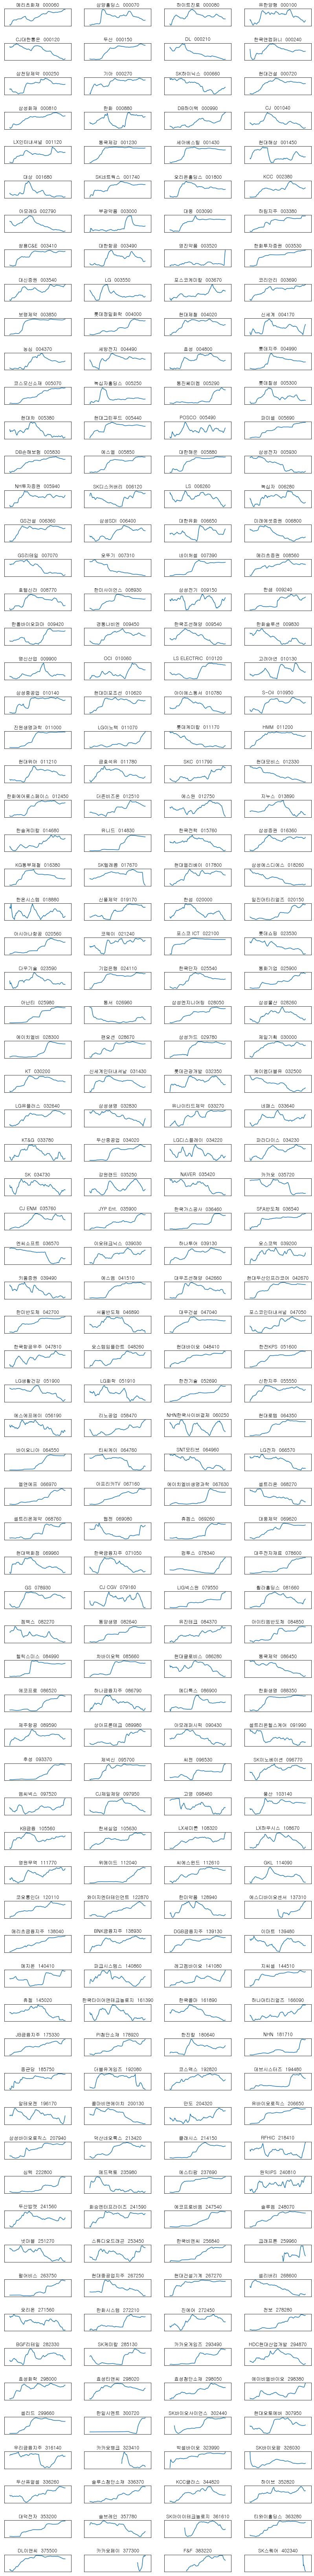

In [4]:
import csv
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

with open('data_3006_20211212.csv', encoding='euc-kr') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    codes = {}
    for line in reader:
        codes[line[0]] = line[1]
        
ind = 1
x = np.arange(200)

plt.rcParams["figure.figsize"] = (14, 120)
plt.subplots_adjust(hspace = 1)
for fn in glob.glob("주가_거래/*.csv"):
    data = pd.read_csv(fn, encoding='utf-8')
    price_r = data['종가'].abs()  # price 
    price = price_r[::-1].reset_index(drop=True)
    volume_r = data['거래량']     # volume
    volume = volume_r[::-1].reset_index(drop=True)
    obv = []
    obv.append(0)
    for i in range(1, len(price)):
        try: 
            if price[i] > price[i-1]:
                obv.append(obv[-1] + volume[i])
            elif price[i] < price[i-1]:
                obv.append(obv[-1] - volume[i])
            else:
                obv.append(obv[-1])
        except KeyError:
            break
    tmp = np.empty(200)
    tmp[:] = np.nan
    df_tmp = pd.DataFrame(tmp)  
    full_obv = df_tmp[0]  # change shape(1200,1) to change(1200)
    full_obv[full_obv.size-len(obv):] = obv  
    plt.subplot(75, 4, ind)
    title = fn.replace("주가_거래\\", "").replace(".csv", "")
    plt.title(codes[title] + "  " + title)
    plt.xlim(-20, 220)
    signal9 = full_obv.ewm(span=9).mean()
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.plot(x, signal9)
    ind = ind + 1

plt.savefig('obv.png', facecolor='#eeeeee')
plt.show()


        